In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

### Convert to mg/L

$\frac{mg}{L}: y_{CO_2}\frac{𝑃·𝑀𝑟}{𝑅·𝑇}$

where:

$P: atm$

$Mr: g/mol$

$T: K$

$R: atm~m^3/mol/K$

In [2]:
P = 1 # atm
Mr = 44.01 # g/mol for CO2
T = 298.15 # K
R = 8.205e-5 # atm.m3/mol/K

In [3]:
# create a dataframe with experimental results - x: Molar ratio of co2 [dimensionless] and y: Adsorption capacity [mg/g] 
df = pd.DataFrame({'x': [0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                 'y': [52.64, 72.59, 99.67, 141.79, 182.48, 203.68, 203.56, 204.33, 204.90]})


# define x and y column
xdata = df.loc[:, 'x']*P*Mr/R/T # mg/L
ydata = df.loc[:, 'y']

xtest = np.linspace(min(xdata), max(xdata), 50)

**Chemical adsorption isotherm models - Langmuir**

**Langmuir**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($q_{max}$, K$_L$) using **non linear methods**:

$q_e=\frac{q_{max}K_LC_e}{1+C_eK_L}$

The values of ['k_l in (L/mg)', 'q_max in (mg/g)'] are [5.97115345e-02 2.11838755e+02]


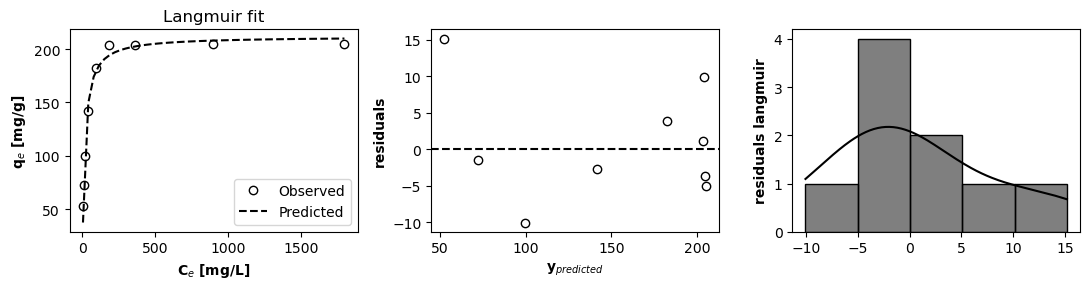

In [4]:
param_names = ['k_l in (L/mg)', 'q_max in (mg/g)']

langmuir = lambda x, *p: p[0]*p[1]*x/(1+p[0]*x)
     
langmuir_params, pcov = curve_fit(langmuir, 
                         xdata, 
                         ydata,
                         [1, 200],
                         bounds=(0, [500, 500]))

print('The values of', param_names, 'are', langmuir_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, langmuir(xtest, *langmuir_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize = 10, fontweight = 'bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize = 10, fontweight = 'bold')
ax[0].legend()
ax[0].set_title('Langmuir fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(ydata, ydata - langmuir(xdata, *langmuir_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - langmuir(xdata, *langmuir_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals langmuir", fontsize = 10, fontweight = 'bold')
# ax[2].grid(ls = ":")

fig.tight_layout()

**Adsorption empirical isotherm models - Freundlich, Temkin, Toth & Sips**

**Freundlich**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($k_{f}$, n$_f$) using **non linear methods**:

$q_e=k_f{C_e}^{1/n_f}$

The values of ['k_f in (L^(1/n_f)·mg^(1-1/n_f)·g^-1)', 'n_f'] are [71.66487816  6.254924  ]


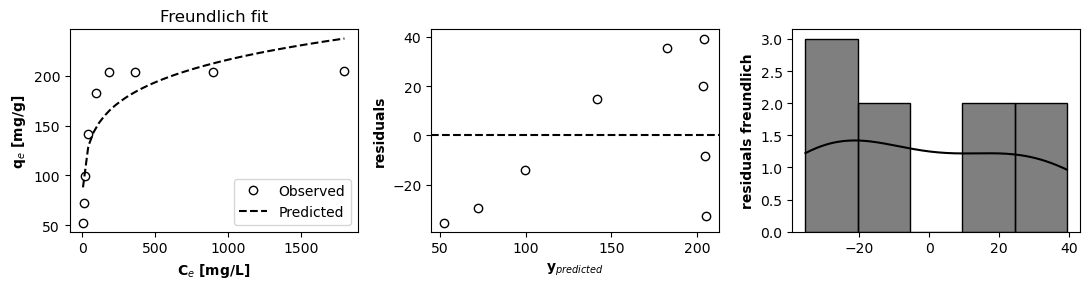

In [5]:
param_names = ['k_f in (L^(1/n_f)·mg^(1-1/n_f)·g^-1)', 'n_f']

freundlich = lambda x, *p: p[0]*x**(1/p[1])

freundlich_params, pcov = curve_fit(freundlich, 
                         xdata, 
                         ydata,
                         p0 = [50, 2],
                         bounds=(0, [np.inf, np.inf]))

print('The values of', param_names, 'are', freundlich_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, freundlich(xtest, *freundlich_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize = 10, fontweight = 'bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize = 10, fontweight = 'bold')
ax[0].legend()
ax[0].set_title('Freundlich fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(ydata, ydata - freundlich(xdata, *freundlich_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - freundlich(xdata, *freundlich_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals freundlich", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

**Temkin**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($a_{T}$, b$_T$) using **non linear methods**:

$q_e=\frac{RT}{b_T}ln(a_TC_e)$

The values of ['a_T in (L/mg)', 'b_T in (J/mol)'] are [ 2.98279627 90.13907675]


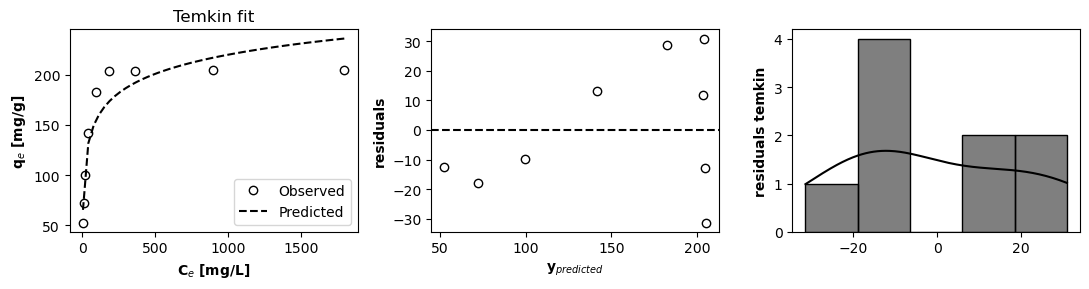

In [6]:
param_names = ['a_T in (L/mg)', 'b_T in (J/mol)']

temkin = lambda x, *p: (8.314*298.15/p[1])*(np.log(p[0]*x))
        
temkin_params, pcov = curve_fit(temkin,
                         xdata,
                         ydata,
                         p0 = [100, 100],
                         bounds=(0, [500, 500]))

print('The values of', param_names, 'are', temkin_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, temkin(xtest, *temkin_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize = 10, fontweight = 'bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize = 10, fontweight = 'bold')
ax[0].legend()
ax[0].set_title('Temkin fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(ydata, ydata - temkin(xdata, *temkin_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - temkin(xdata, *temkin_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals temkin", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

**Toth**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($q_{max}$, $K_{th}$, $n_{th}$) using **non linear methods**:

$q_e=\frac{q_{max}C_e}{(K_{th}+C_e^{n_{th}})^{1/n_{th}}}$

The values of ['q_max in (mg/g)', 'a_th in (mg^z·L^-z)', 'n_th (dimensionless)'] are [212.27315512  15.63689373   0.98319672]


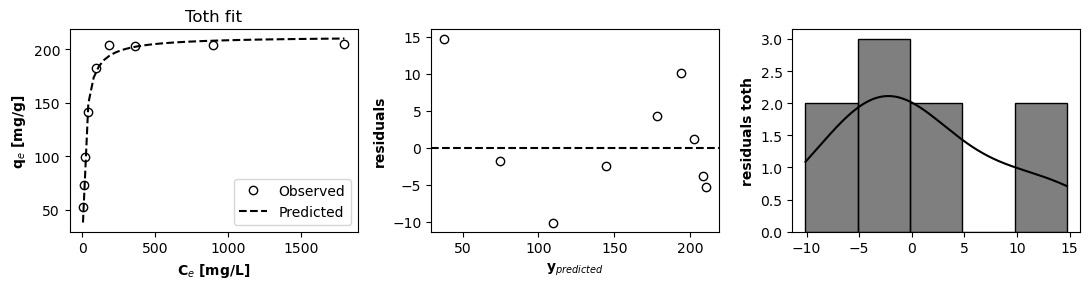

In [7]:
param_names = ['q_max in (mg/g)', 'a_th in (mg^z·L^-z)', 'n_th (dimensionless)']

toth = lambda x, *p: p[0]*x/(p[1] + x**p[2])**(1/p[2])
        
toth_params, pcov = curve_fit(toth,
                         xdata,
                         ydata,
                         p0 = [1, 1, 1],
                         bounds=(0, [1e5, 1e5, 2]))

print('The values of', param_names, 'are', toth_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, toth(xtest, *toth_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize=10, fontweight='bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize=10, fontweight='bold')
ax[0].legend()
ax[0].set_title('Toth fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(toth(xdata, *toth_params), ydata - toth(xdata, *toth_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - toth(xdata, *toth_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals toth", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

**Sips**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($q_{max}$, K$_{sp}$, $n_{sp}$) using **non linear methods**:

$q_e=\frac{q_{max}K_sC_e^{1/n_{sp}}}{1+K_{sp}C_e^{1/n_{sp}}}$

The values of ['q_max in (mg/g)', 'K_sp in (L^ns·mg^-ns)', 'n_sp (dimensionless)'] are [2.13647469e+02 6.85103547e-02 9.46361651e-01]


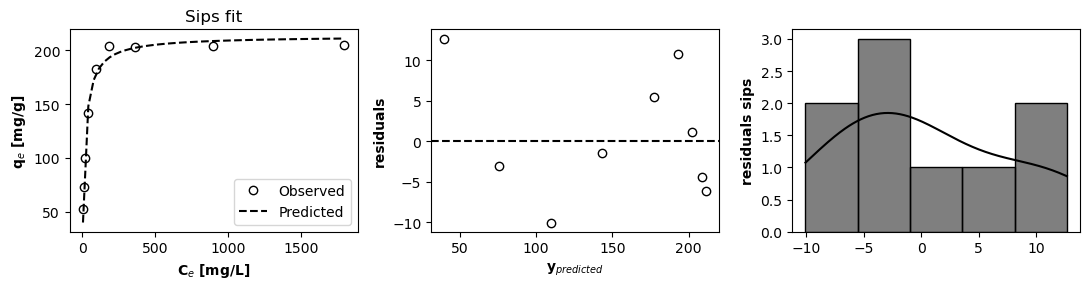

In [8]:
param_names = ['q_max in (mg/g)', 'K_sp in (L^ns·mg^-ns)', 'n_sp (dimensionless)']

sips = lambda x, *p: p[0]*p[1]*x**p[2]/(1+p[1]*x**p[2])
  
sips_params, pcov = curve_fit(sips, 
                         xdata, 
                         ydata,
                         p0 = [2, 0.01, 0.01],
                         bounds=(0, [np.inf, np.inf, np.inf]))

print('The values of', param_names, 'are', sips_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, sips(xtest, *sips_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize=10, fontweight='bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize=10, fontweight='bold')
ax[0].legend()
ax[0].set_title('Sips fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(sips(xdata, *sips_params), ydata - sips(xdata, *sips_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - sips(xdata, *sips_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals sips", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

**Adsorption models based on the Polanyi’s potential theory - DR**

**DR**

Create a plot of ($q_e$ vs $C_e$) to calculate parameters ($k_{DR}$, q$_{max}$) using **non linear methods**:

$q_e=q_{max}exp({\frac{(RTln(1+\frac{1}{C_e}))^2}{-2E_{DR}^2}})$

The values of ['E_DR in (J/mol)', 'qmax in (mg/g)'] are [147.67076439 192.66336195]


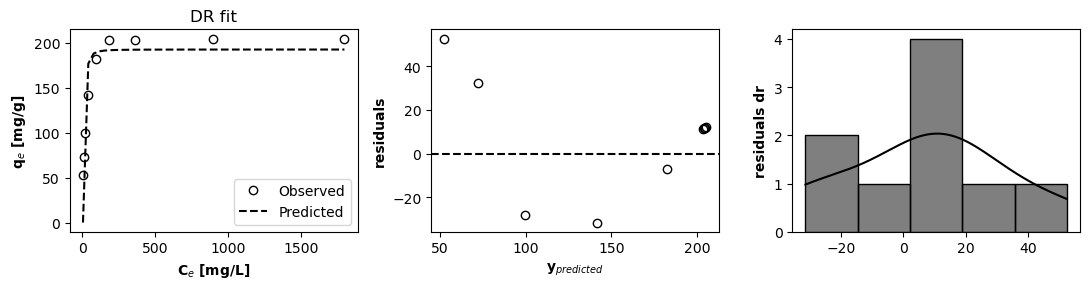

In [14]:
param_names = ['E_DR in (J/mol)', 'qmax in (mg/g)']

dr = lambda x, *p: p[1]*np.exp((8.314*298.15*np.log(1+1/x))**2/(-2*p[0]**2))
        
dr_params, pcov = curve_fit(dr, 
                         xdata, 
                         ydata,
                         p0 = [1, 1],
                         bounds=(0, [np.inf, np.inf]))

print('The values of', param_names, 'are', dr_params)

fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, dr(xtest, *dr_params), 'k--', mfc = 'none', label = 'Predicted')
ax[0].set_xlabel("C$_e$ [mg/L]", fontsize = 10, fontweight='bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize = 10, fontweight='bold')
ax[0].legend()
ax[0].set_title('DR fit')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(ydata, ydata - dr(xdata, *dr_params), 'ko', mfc = 'none')
ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")

sns.histplot(ydata - dr(xdata, *dr_params), kde=True, color ='k', ax = ax[2])

ax[2].set_ylabel("residuals dr", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

### Observations

When E$_{DR}$ is lower than 8kJ/mol physisorpt

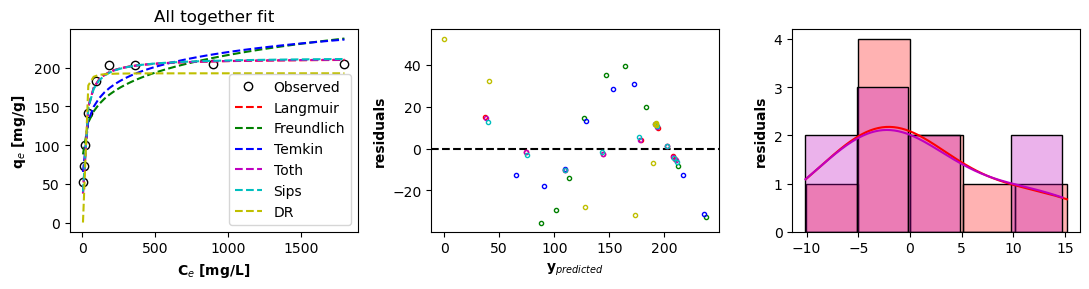

In [10]:
fig, ax = plt.subplots(ncols = 3, figsize = (11,3))

ax[0].plot(xdata, ydata, 'ko', mfc = 'none', label = 'Observed')
ax[0].plot(xtest, langmuir(xtest, *langmuir_params), 'r--', mfc = 'none', label = 'Langmuir')
ax[0].plot(xtest, freundlich(xtest, *freundlich_params), 'g--', mfc = 'none', label = 'Freundlich')
ax[0].plot(xtest, temkin(xtest, *temkin_params), 'b--', mfc = 'none', label = 'Temkin')
ax[0].plot(xtest, toth(xtest, *toth_params), 'm--', mfc = 'none', label = 'Toth')
ax[0].plot(xtest, sips(xtest, *sips_params), 'c--', mfc = 'none', label = 'Sips')
ax[0].plot(xtest, dr(xtest, *dr_params), 'y--', mfc = 'none', label = 'DR')

ax[0].set_xlabel("C$_e$ [mg/L]", fontsize=10, fontweight='bold')
ax[0].set_ylabel("q$_e$ [mg/g]", fontsize=10, fontweight='bold')
ax[0].legend()
ax[0].set_title('All together fit')
#ax[0].grid(ls = ':')

ax[1].axhline(y = 0.0, color = 'k', linestyle = '--')
ax[1].plot(langmuir(xdata, *langmuir_params), ydata - langmuir(xdata, *langmuir_params), 'r.', mfc = 'none')
ax[1].plot(freundlich(xdata, *freundlich_params), ydata - freundlich(xdata, *freundlich_params), 'g.', mfc = 'none')
ax[1].plot(temkin(xdata, *temkin_params), ydata - temkin(xdata, *temkin_params), 'b.', mfc = 'none')
ax[1].plot(toth(xdata, *toth_params), ydata - toth(xdata, *toth_params), 'm.', mfc = 'none')
ax[1].plot(sips(xdata, *sips_params), ydata - sips(xdata, *sips_params), 'c.', mfc = 'none')
ax[1].plot(dr(xdata, *dr_params), ydata - dr(xdata, *dr_params), 'y.', mfc = 'none')

ax[1].set_xlabel('y$_{predicted}$', fontsize = 10, fontweight = "bold")
ax[1].set_ylabel('residuals', fontsize = 10, fontweight = "bold")
#ax[1].grid(ls = ':')

sns.histplot(ydata - langmuir(xdata, *langmuir_params), kde=True, color ='r', alpha = 0.3, ax = ax[2])
sns.histplot(ydata - toth(xdata, *toth_params), kde=True, color ='m', alpha = 0.3, ax = ax[2])

ax[2].set_ylabel("residuals", fontsize = 10, fontweight = 'bold')

fig.tight_layout()

### Observations

Best models Langmuir, Toth